## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Baca Gambar & Konversi ke RGB

In [9]:
# Baca gambar asli dan konversi ke RGB
img = cv2.imread("image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1. DETEKSI WARNA PADA CITRA 

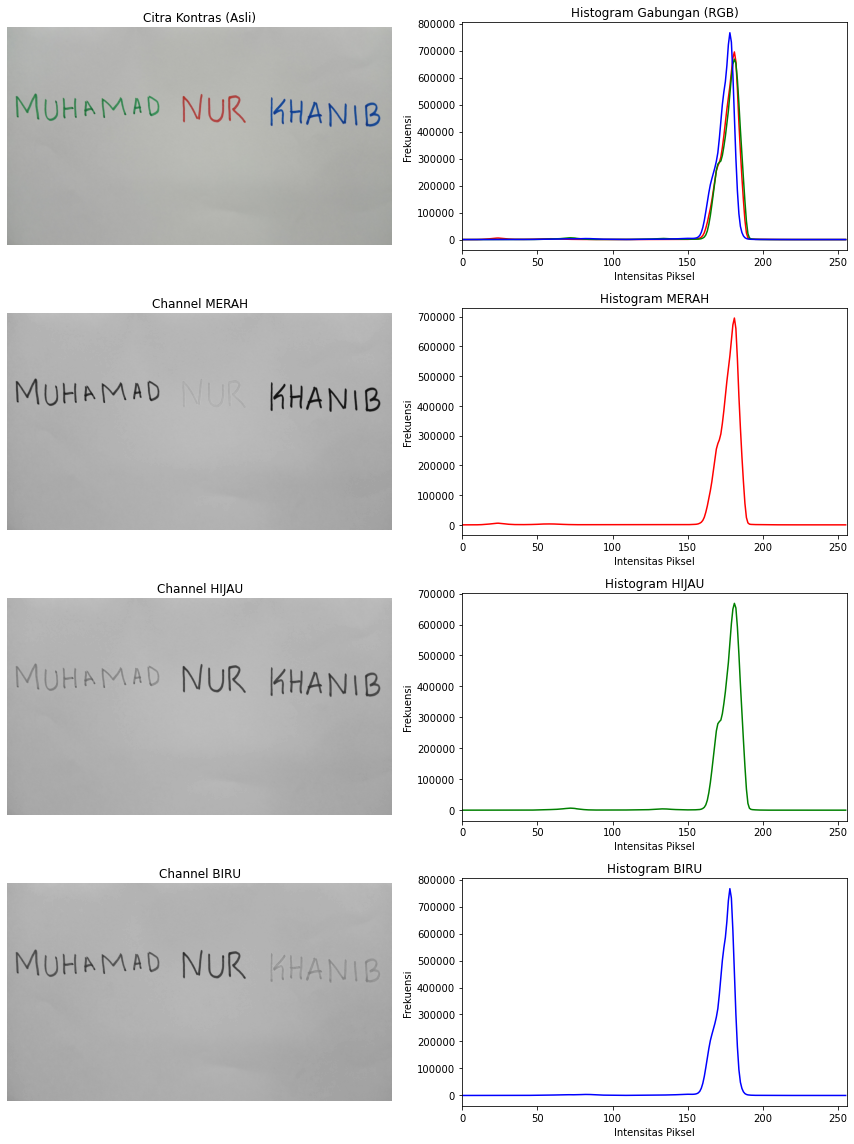

In [10]:
# Pisahkan channel RGB
r, g, b = cv2.split(img_rgb)

# Buat subplot: 4 baris, 2 kolom (gambar kiri, histogram kanan)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 baris: asli, R, G, B

# Baris 1: Gambar Asli
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Kontras (Asli)")
axes[0, 0].axis('off')

# Histogram Gambar Asli (gabungan R, G, B)
colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    axes[0, 1].plot(hist, color=col)
axes[0, 1].set_title("Histogram Gabungan (RGB)")
axes[0, 1].set_xlim([0, 256])
axes[0, 1].set_xlabel("Intensitas Piksel")
axes[0, 1].set_ylabel("Frekuensi")

# Baris 2: Merah
axes[1, 0].imshow(r, cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("Channel MERAH")
axes[1, 0].axis('off')

hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
axes[1, 1].plot(hist_r, color='red')
axes[1, 1].set_title("Histogram MERAH")
axes[1, 1].set_xlim([0, 256])
axes[1, 1].set_xlabel("Intensitas Piksel")
axes[1, 1].set_ylabel("Frekuensi")

# Baris 3: Hijau
axes[2, 0].imshow(g, cmap='gray', vmin=0, vmax=255)
axes[2, 0].set_title("Channel HIJAU")
axes[2, 0].axis('off')

hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
axes[2, 1].plot(hist_g, color='green')
axes[2, 1].set_title("Histogram HIJAU")
axes[2, 1].set_xlim([0, 256])
axes[2, 1].set_xlabel("Intensitas Piksel")
axes[2, 1].set_ylabel("Frekuensi")

# Baris 4: Biru
axes[3, 0].imshow(b, cmap='gray', vmin=0, vmax=255)
axes[3, 0].set_title("Channel BIRU")
axes[3, 0].axis('off')

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
axes[3, 1].plot(hist_b, color='blue')
axes[3, 1].set_title("Histogram BIRU")
axes[3, 1].set_xlim([0, 256])
axes[3, 1].set_xlabel("Intensitas Piksel")
axes[3, 1].set_ylabel("Frekuensi")

# Atur layout agar rapi
plt.tight_layout()
plt.show()


##  2.  AMBANG BATAS TERKECIL SAMPAI DENGAN TERBESAR 

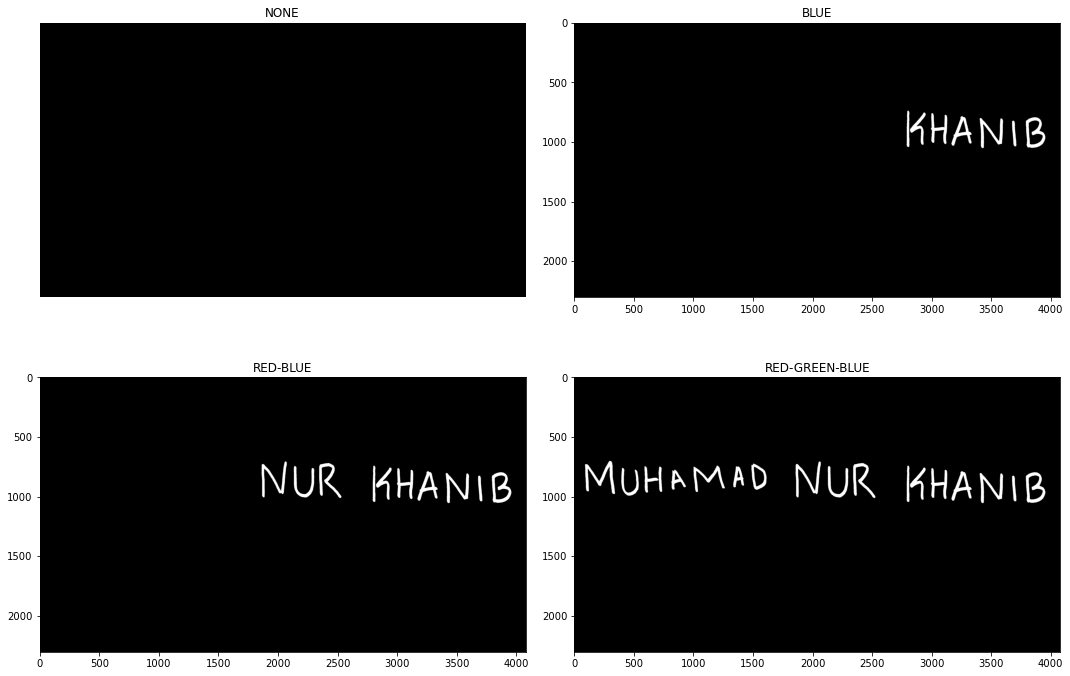

In [11]:
# Baca gambar
image = cv2.imread('image.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Buat background hitam
background = np.zeros_like(image)

# Fungsi bantu untuk membuat mask HSV
def get_hsv_mask(hsv_img, lower, upper):
    mask = cv2.inRange(hsv_img, np.array(lower), np.array(upper))
    return mask

# Mask biru (hue sekitar 100–140)
blue_mask = get_hsv_mask(hsv, [100, 50, 50], [140, 255, 255])

# Mask merah (hue sekitar 0–10 dan 160–180)
red_mask1 = get_hsv_mask(hsv, [0, 50, 50], [10, 255, 255])
red_mask2 = get_hsv_mask(hsv, [160, 50, 50], [180, 255, 255])
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Mask hijau (hue sekitar 40–85) → dilebarkan range-nya
green_mask = get_hsv_mask(hsv, [35, 40, 40], [85, 255, 255])

# PERBAIKI: tambahkan dilasi kecil hanya untuk hijau
kernel = np.ones((2, 2), np.uint8)
green_mask_dilated = cv2.dilate(green_mask, kernel, iterations=1)

# Gabungkan sesuai kategori
# BLUE only
blue_image = background.copy()
blue_image[blue_mask > 0] = [255, 255, 255]

# RED + BLUE
red_blue_mask = cv2.bitwise_or(red_mask, blue_mask)
red_blue_image = background.copy()
red_blue_image[red_blue_mask > 0] = [255, 255, 255]

# RED + GREEN + BLUE (pakai green yang sudah didilate)
rgb_mask = cv2.bitwise_or(red_blue_mask, green_mask_dilated)
rgb_image = background.copy()
rgb_image[rgb_mask > 0] = [255, 255, 255]

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.title("NONE")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(blue_image, cv2.COLOR_BGR2RGB))
plt.title("BLUE")
plt.axis('on')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(red_blue_image, cv2.COLOR_BGR2RGB))
plt.title("RED-BLUE")
plt.axis('on')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RED-GREEN-BLUE")
plt.axis('on')

plt.tight_layout()
plt.show()


## 3. Memperbaiki Gambar Backlight 

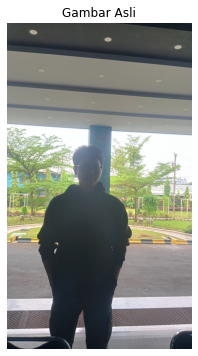

In [12]:
# Membaca gambar asli
img = cv2.imread("foto.jpg")

# Tampilkan gambar asli
plt.figure(figsize=(8, 6))

# Konversi BGR ke RGB untuk ditampilkan dengan matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

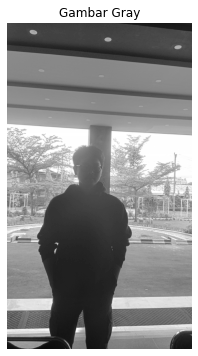

In [13]:
# Konversi gambar ke grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap="gray")
plt.title("Gambar Gray")
plt.axis("off")
plt.show()

In [14]:
# Fungsi untuk adjusting brightness dan contrast
def adjust_brightness(img, beta):
    """
    Menambahkan nilai beta ke setiap pixel untuk meningkatkan kecerahan.
    beta: nilai kecerahan (contoh: 50)
    """
    return cv2.convertScaleAbs(img, alpha=1.0, beta=beta)

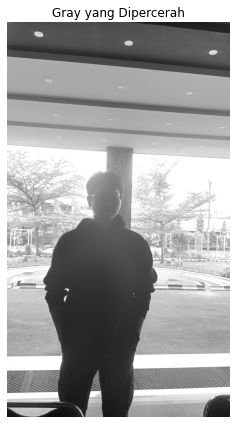

In [15]:
gray_bright = adjust_brightness(gray, beta=50)

# Tampilkan hasil-hasilnya
fig, ax = plt.subplots(figsize=(8, 6)) 
ax.imshow(gray_bright, cmap="gray")
ax.set_title("Gray yang Dipercerah")
ax.axis("off")

plt.tight_layout()
plt.show()

In [16]:
def adjust_contrast(img, alpha):
    """
    Mengalikan nilai pixel dengan alpha untuk meningkatkan kontras.
    alpha: faktor peningkatan kontras (contoh: 1.5)
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=0)

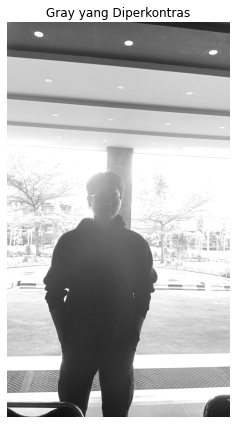

In [17]:
# Gambar Gray yang diperkontras (hanya kontras)
gray_contrast = adjust_contrast(gray, alpha=1.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(gray_contrast, cmap="gray")
ax.set_title("Gray yang Diperkontras")
ax.axis("off")

plt.tight_layout()
plt.show()

In [18]:
def adjust_brightness_contrast(img, beta, alpha):
    """
    Melakukan peningkatan kecerahan (beta) dan kontras (alpha) secara bersamaan.
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

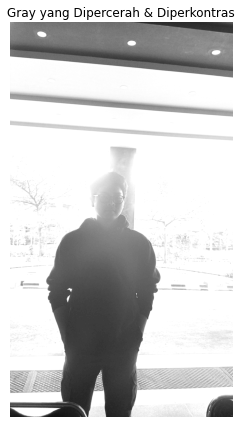

In [19]:
# Gambar Gray yang dipercerah dan diperkontras
gray_bright_contrast = adjust_brightness_contrast(gray, beta=50, alpha=1.5)
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(gray_bright_contrast, cmap="gray")
ax.set_title("Gray yang Dipercerah & Diperkontras")
ax.axis("off")

plt.tight_layout()
plt.show()